In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [2]:
df=pd.read_csv("StateUT wise analysis.csv")

In [3]:
df.head()

,STATE/UT,YEAR,Literacy rates as %,Population,% India Population,Growth(2001-2012),Area(km^2),Murder,Theft,Riots,Robbery,Rape,TOTAL IPC CRIMES
0,ANDHRA PRADESH,2011,60.47,49577103.0,4.10%,11.00%,162975.0,2808,28267,2210,600,1442,189780
1,ARUNACHAL PRADESH,2011,54.34,1383727.0,0.11%,26.00%,83743.0,65,414,49,64,42,2286
2,ASSAM,2011,63.25,31205576.0,2.58%,17.10%,78438.0,1303,8309,2328,837,1700,66714
3,BIHAR,2011,47.00,104099452.0,8.60%,25.40%,94163.0,3198,16292,9768,1381,934,135896
4,CHHATTISGARH,2011,64.66,25545198.0,2.11%,22.60%,135192.0,1110,5315,934,470,1053,57218


In [4]:
df.tail()

,STATE/UT,YEAR,Literacy rates as %,Population,% India Population,Growth(2001-2012),Area(km^2),Murder,Theft,Riots,Robbery,Rape,TOTAL IPC CRIMES
30,D & N HAVELI,2011,57.63,585764.0,0.05%,55.10%,603.0,14,69,20,2,4,372
31,DAMAN & DIU,2011,78.18,NaN,NaN,NaN,NaN,6,47,19,6,1,224
32,DELHI UT,2011,81.67,16787941.0,1.39%,21.20%,1484.0,64,2578,5,43,73,5883
33,LAKSHADWEEP,2011,86.66,64473.0,0.01%,6.30%,32.0,0,4,5,0,0,44
34,PUDUCHERRY,2011,81.24,1247953.0,0.10%,28.10%,479.0,32,707,125,11,7,4362


In [5]:
df.columns

Index(['STATE/UT', 'YEAR', 'Literacy rates as %', 'Population',
       '% India Population', 'Growth(2001-2012)', 'Area(km^2)', 'Murder',
       'Theft', 'Riots', 'Robbery', 'Rape', 'TOTAL IPC CRIMES'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   STATE/UT             35 non-null     object 
 1   YEAR                 35 non-null     int64  
 2   Literacy rates as %  35 non-null     float64
 3   Population           34 non-null     float64
 4   % India Population   34 non-null     object 
 5   Growth(2001-2012)    34 non-null     object 
 6   Area(km^2)           34 non-null     float64
 7   Murder               35 non-null     int64  
 8   Theft                35 non-null     int64  
 9   Riots                35 non-null     int64  
 10  Robbery              35 non-null     int64  
 11  Rape                 35 non-null     int64  
 12  TOTAL IPC CRIMES     35 non-null     int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 3.7+ KB


# Find the population of each state

In [7]:
State_Population=df[["STATE/UT","Population"]]

In [8]:
State_Population

,STATE/UT,Population
0,ANDHRA PRADESH,49577103.0
1,ARUNACHAL PRADESH,1383727.0
2,ASSAM,31205576.0
3,BIHAR,104099452.0
4,CHHATTISGARH,25545198.0
5,GOA,1458545.0
6,GUJARAT,60439692.0
7,HARYANA,25351462.0
8,HIMACHAL PRADESH,6864602.0
9,JAMMU & KASHMIR,12267032.0


In [15]:
State_Literacy=df[["STATE/UT","Literacy rates as %"]]


In [16]:
State_Literacy

,STATE/UT,Literacy rates as %
0,ANDHRA PRADESH,60.47
1,ARUNACHAL PRADESH,54.34
2,ASSAM,63.25
3,BIHAR,47.00
4,CHHATTISGARH,64.66
5,GOA,82.01
6,GUJARAT,69.14
7,HARYANA,67.91
8,HIMACHAL PRADESH,76.48
9,JAMMU & KASHMIR,55.52


In [18]:
State_Area=df[["STATE/UT","Area(km^2)"]]
State_Area

,STATE/UT,Area(km^2)
0,ANDHRA PRADESH,162975.0
1,ARUNACHAL PRADESH,83743.0
2,ASSAM,78438.0
3,BIHAR,94163.0
4,CHHATTISGARH,135192.0
5,GOA,3702.0
6,GUJARAT,196024.0
7,HARYANA,44212.0
8,HIMACHAL PRADESH,55673.0
9,JAMMU & KASHMIR,44241.0


# 2.1 Analysis of Literacy Rate vs Total Crimes.

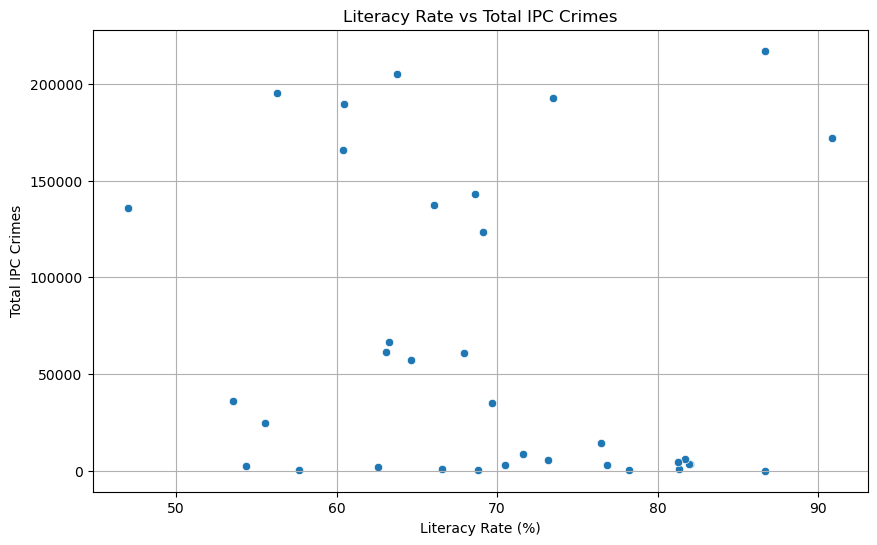

In [19]:
# Plot the data to visualize the relationship between literacy rates and total crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Literacy rates as %', y='TOTAL IPC CRIMES', data=df)
plt.title('Literacy Rate vs Total IPC Crimes')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

In [21]:
from scipy.stats import pearsonr

In [22]:
# Perform a statistical analysis to quantify the relationship
correlation, p_value = pearsonr(df['Literacy rates as %'], df['TOTAL IPC CRIMES'])
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Pearson correlation coefficient: -0.15186523330872131
P-value: 0.38381711591239087


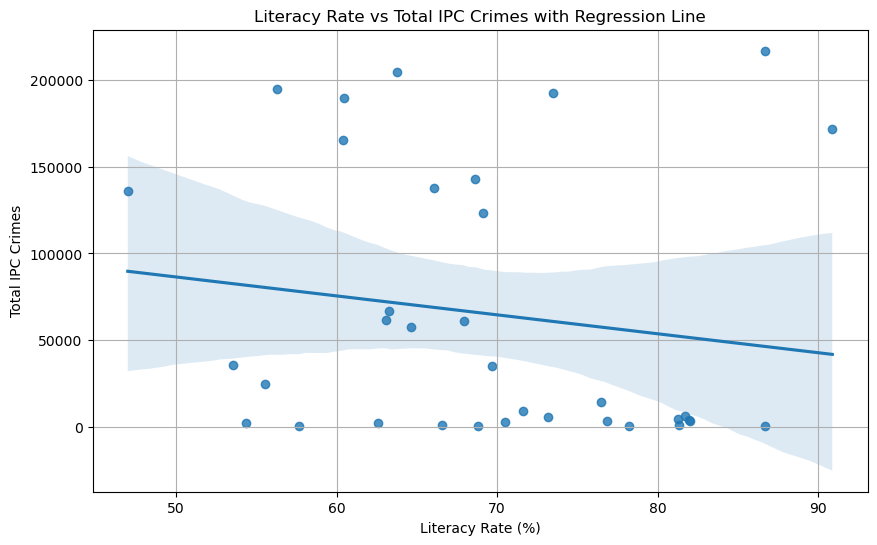

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Literacy rates as %', y='TOTAL IPC CRIMES', data=df)
plt.title('Literacy Rate vs Total IPC Crimes with Regression Line')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

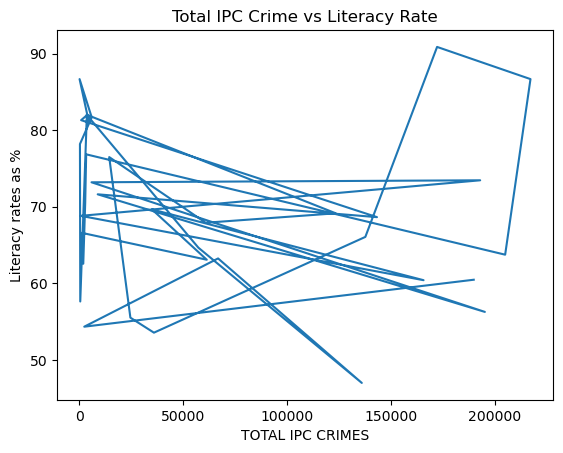

In [25]:
X=df["TOTAL IPC CRIMES"]
Y=df["Literacy rates as %"]
plt.plot(X,Y)
plt.xlabel("TOTAL IPC CRIMES")
plt.ylabel("Literacy rates as %")
plt.title("Total IPC Crime vs Literacy Rate")
plt.show()

<Axes: xlabel='TOTAL IPC CRIMES', ylabel='Literacy rates as %'>

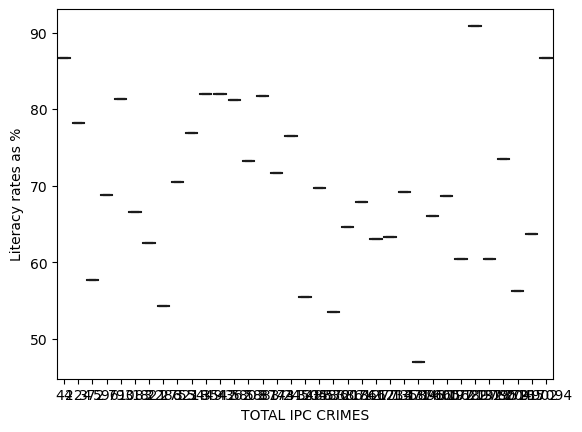

In [26]:
sns.boxplot(y="Literacy rates as %", x="TOTAL IPC CRIMES", data=df, palette = 'pink')

# 2.2Analysis of the type of crime vs each state vs Literacy rate.

In [27]:
# Melt the DataFrame to make it suitable for Seaborn's barplot
df_melted = df.melt(id_vars=['STATE/UT', 'Literacy rates as %'], 
                    value_vars=['Murder', 'Theft', 'Riots', 'Robbery', 'Rape'],
                    var_name='Crime Type', value_name='Crime Count')

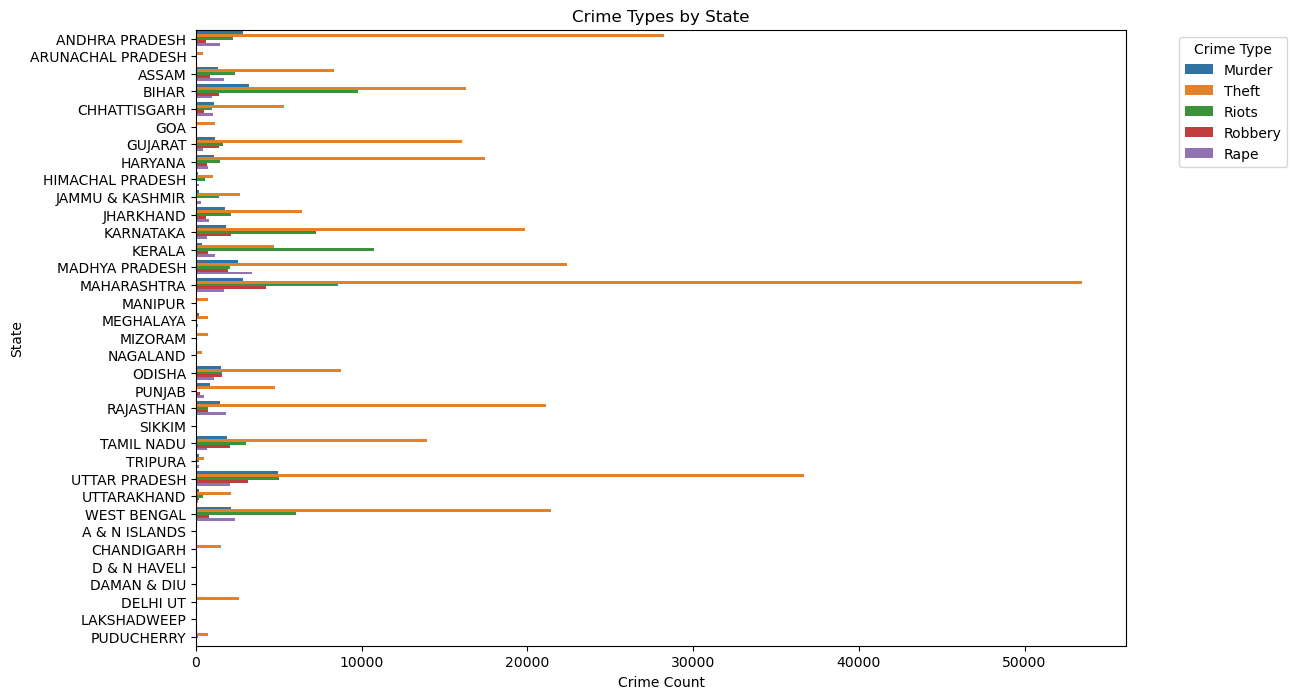

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Crime Count', y='STATE/UT', hue='Crime Type', data=df_melted)
plt.title('Crime Types by State')
plt.xlabel('Crime Count')
plt.ylabel('State')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# from above graph we can see clearly that theft case is more Maharashtra then Uttar pradesh then Andhra Pradesh 
# Riots is mostly in kerla

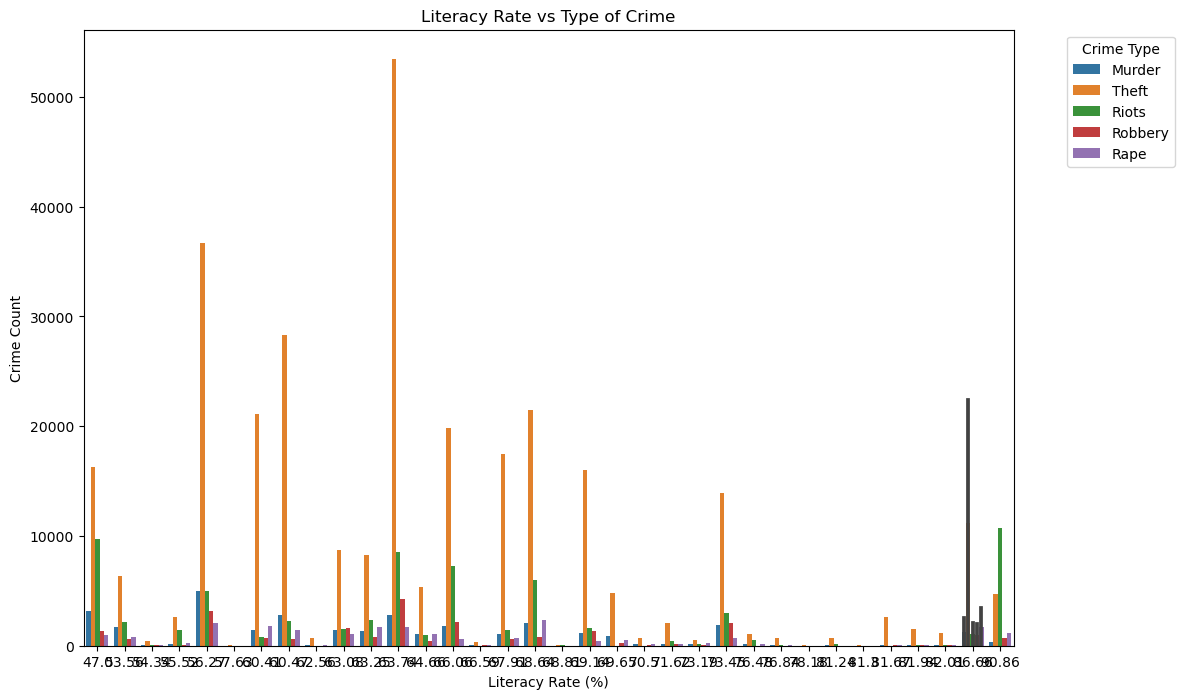

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Literacy rates as %', y='Crime Count', hue='Crime Type', data=df_melted)
plt.title('Literacy Rate vs Type of Crime')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Crime Count')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# From above bar graph we clearly see that as literacy rate increase crime rate decreases 

# 2.3 Analysis of year-on-year total crime rate.

In [34]:
# Calculate the year-on-year total crime rate for each state
yearly_crime = df.groupby('YEAR')['TOTAL IPC CRIMES'].sum().reset_index()

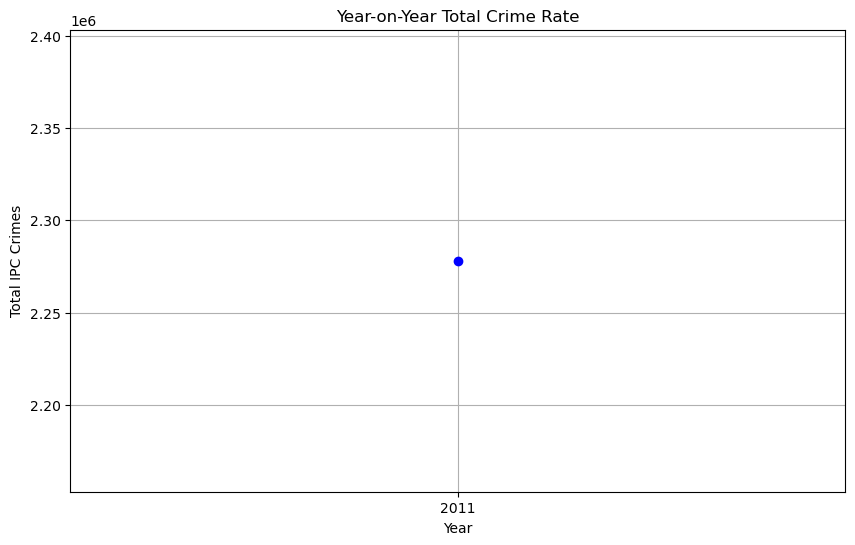

In [35]:
# Plotting the year-on-year total crime rate
plt.figure(figsize=(10, 6))
plt.plot(yearly_crime['YEAR'], yearly_crime['TOTAL IPC CRIMES'], marker='o', linestyle='-', color='b')
plt.title('Year-on-Year Total Crime Rate')
plt.xlabel('Year')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.xticks(yearly_crime['YEAR'])
plt.show()

# Here we consider only year 2011 so result is not accurate

In [36]:
yearly_crime['Growth Rate (%)'] = yearly_crime['TOTAL IPC CRIMES'].pct_change() * 100
print(yearly_crime)

   YEAR  TOTAL IPC CRIMES  Growth Rate (%)
0  2011           2278105              NaN


#  2.4Analysis of area vs overall crime.

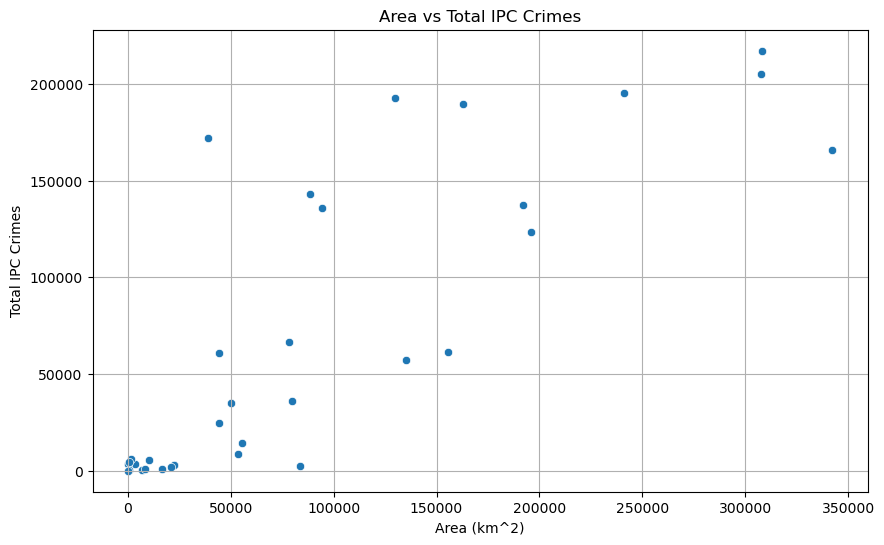

In [37]:
# Plot the data to visualize the relationship between area and total crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area(km^2)', y='TOTAL IPC CRIMES', data=df)
plt.title('Area vs Total IPC Crimes')
plt.xlabel('Area (km^2)')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()


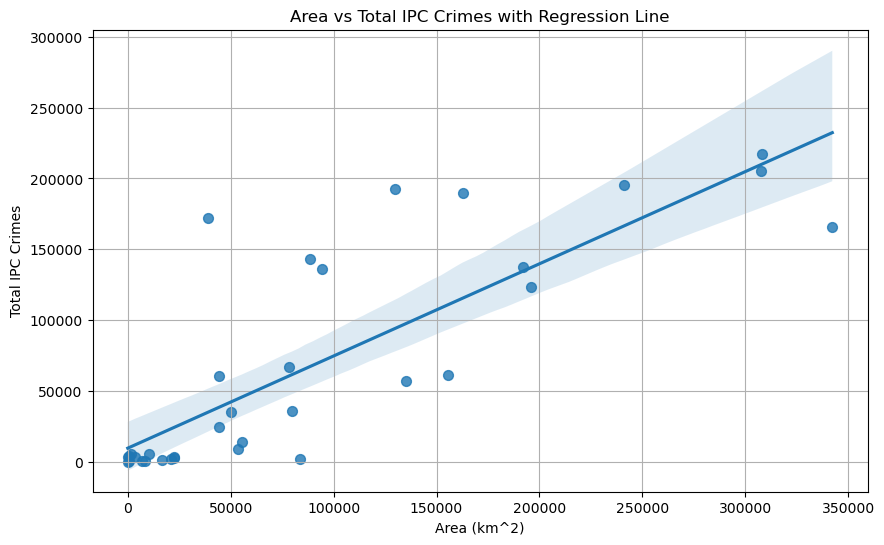

In [38]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Area(km^2)', y='TOTAL IPC CRIMES', data=df, scatter_kws={'s':50})
plt.title('Area vs Total IPC Crimes with Regression Line')
plt.xlabel('Area (km^2)')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

# 2.5Analysis of Population vs overall Crime.

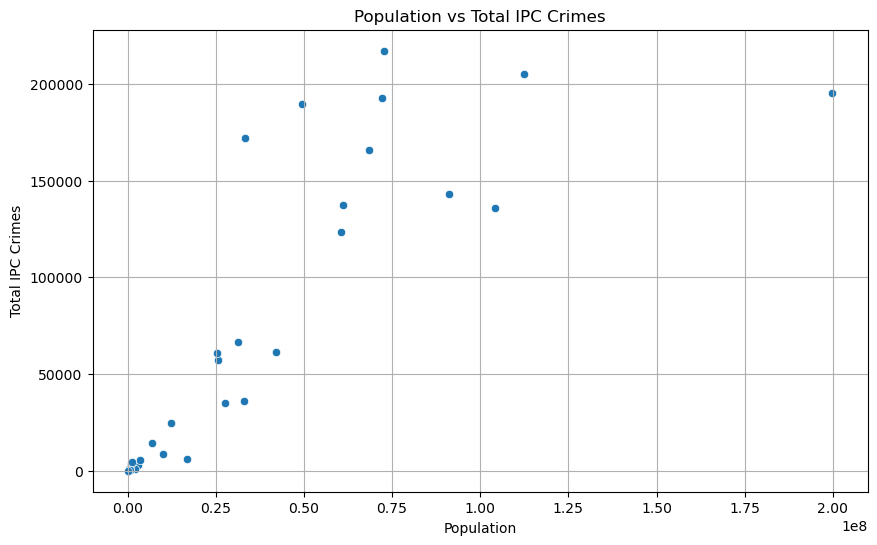

In [39]:
# Plot the data to visualize the relationship between population and total crimes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='TOTAL IPC CRIMES', data=df)
plt.title('Population vs Total IPC Crimes')
plt.xlabel('Population')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()


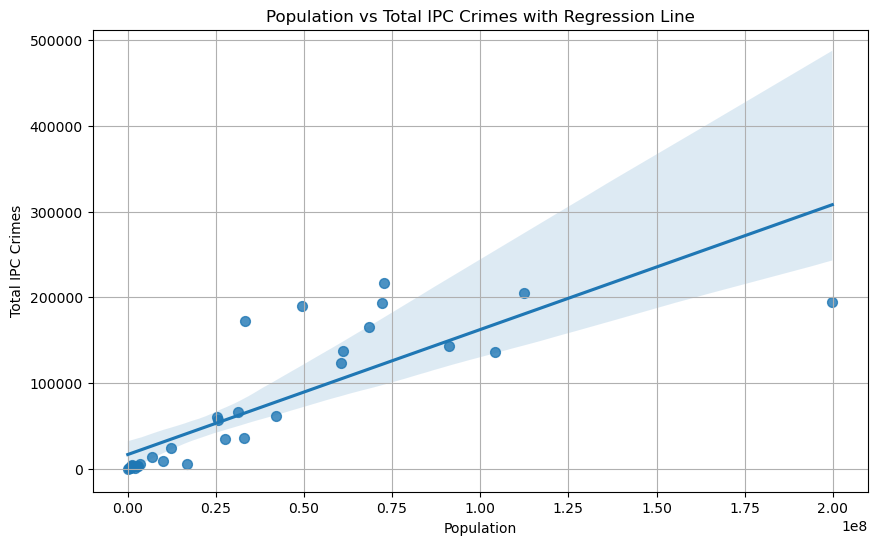

In [40]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='TOTAL IPC CRIMES', data=df, scatter_kws={'s':50})
plt.title('Population vs Total IPC Crimes with Regression Line')
plt.xlabel('Population')
plt.ylabel('Total IPC Crimes')
plt.grid(True)
plt.show()

# If area is less then crime rate per sq meter is high

# 2.6Each state crime report. There is no fixed format to

In [41]:
# Generate a crime report for each state
for index, row in df.iterrows():
    state = row['STATE/UT']
    year = row['YEAR']
    literacy_rate = row['Literacy rates as %']
    population = row['Population']
    area = row['Area(km^2)']
    total_crimes = row['TOTAL IPC CRIMES']
    murder = row['Murder']
    theft = row['Theft']
    riots = row['Riots']
    robbery = row['Robbery']
    rape = row['Rape']
    
    print(f"Crime Report for {state} (Year: {year})")
    print(f"----------------------------------------")
    print(f"Population: {population}")
    print(f"Literacy Rate: {literacy_rate}%")
    print(f"Area: {area} km^2")
    print(f"Total IPC Crimes: {total_crimes}")
    print(f"  - Murder: {murder}")
    print(f"  - Theft: {theft}")
    print(f"  - Riots: {riots}")
    print(f"  - Robbery: {robbery}")
    print(f"  - Rape: {rape}")
    print("\n")

Crime Report for ANDHRA PRADESH (Year: 2011)
----------------------------------------
Population: 49577103.0
Literacy Rate: 60.47%
Area: 162975.0 km^2
Total IPC Crimes: 189780
  - Murder: 2808
  - Theft: 28267
  - Riots: 2210
  - Robbery: 600
  - Rape: 1442


Crime Report for ARUNACHAL PRADESH (Year: 2011)
----------------------------------------
Population: 1383727.0
Literacy Rate: 54.34%
Area: 83743.0 km^2
Total IPC Crimes: 2286
  - Murder: 65
  - Theft: 414
  - Riots: 49
  - Robbery: 64
  - Rape: 42


Crime Report for ASSAM (Year: 2011)
----------------------------------------
Population: 31205576.0
Literacy Rate: 63.25%
Area: 78438.0 km^2
Total IPC Crimes: 66714
  - Murder: 1303
  - Theft: 8309
  - Riots: 2328
  - Robbery: 837
  - Rape: 1700


Crime Report for BIHAR (Year: 2011)
----------------------------------------
Population: 104099452.0
Literacy Rate: 47.0%
Area: 94163.0 km^2
Total IPC Crimes: 135896
  - Murder: 3198
  - Theft: 16292
  - Riots: 9768
  - Robbery: 1381
  - Rape